##Import the dataset

In [1]:
import pandas as pd
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Import the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Slicing the dataset

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


##Checking for missing values

In [6]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64


## Selecting features and target

In [8]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

## Splitting the data into training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Standardizing the data

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##KNN Regressor

In [11]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

##SVM Regressor

In [12]:
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

## KMeans Clustering (Not suitable for prediction, but for segmentation)

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
y_kmeans = kmeans.predict(X_test_scaled)

##Evaluating models

In [14]:
def evaluate(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print("\n")

evaluate(y_test, y_pred_knn, "KNN Regressor")
evaluate(y_test, y_pred_svm, "SVM Regressor")

KNN Regressor Performance:
MAE: 1.0895
MSE: 2.20743
RMSE: 1.4857422387480272
R2 Score: 0.9300640472854901


SVM Regressor Performance:
MAE: 1.1621388310185972
MSE: 2.8621091217425514
RMSE: 1.691776912522024
R2 Score: 0.909322457245777




## Visualizing actual vs predicted sales

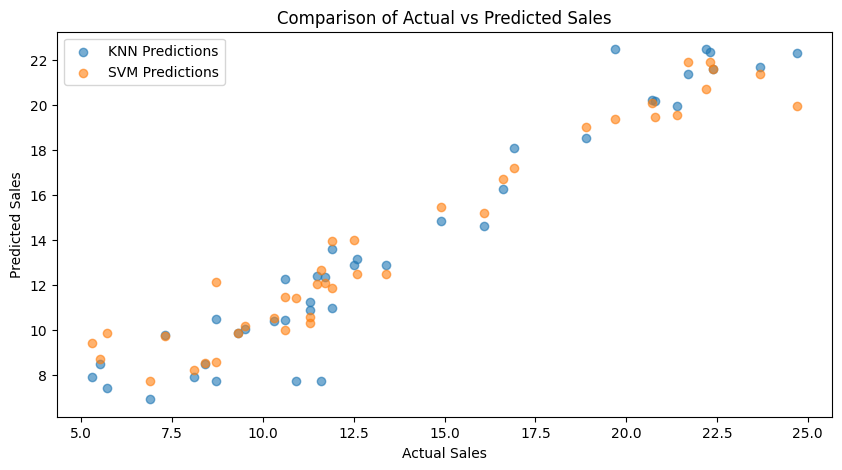

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_knn, label='KNN Predictions', alpha=0.6)
plt.scatter(y_test, y_pred_svm, label='SVM Predictions', alpha=0.6)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.legend()
plt.title("Comparison of Actual vs Predicted Sales")
plt.show()